# Choice of attributes:

- pr_ann_w5e5 (Average annual precipitation from CHELSA W5E5)
- X_ann_cgiar (PET/aridity index from CGIAR)
- ai_ann_bio_chelsa (Aridity index from CHELSA)
- h_mean (Mean elevation of the basin)
- slope (Mean slope in the basin)
- area_km2 (The basin area in square kilometres)
- lc_X (Copernicus land cover - specifically forest cover)
- fs_ann_chelsa (Snow cover fraction from CHELSA)
    - Maybe use SWE here
- gl_fr (Fraction of glaciated area in total basin area)
- tri (Mean Terrain Ruggedness Index)



### **Fastest (Easy to implement)**
1. **`area_km2`** – (Basin Area)  

2. **`h_mean`** – (Mean Elevation)  

3. **`slope`** – (Mean Slope)  

4. **`dominant aspect`** – (Dominant Aspect)  

---

### **Moderate Effort**
4. **`tri`** – (Mean Terrain Ruggedness Index)  


5. **`gl_fr`** – (Glaciated Fraction)  


6. **`lc_X`** – (Forest Cover from `CGLS_LC100`)  


---

### **More Involved**
7. **`Quantiles of Topographic index by Area`** – (Topographic Index)  

8. **`Hypsometric Curve`** → **(Elevation Distribution)**

9. **`fs_ann_chelsa`** → **(Replace CHELSA Snow Cover Fraction with ERA5 SWE)**  

10. **`ai_ann_bio_chelsa`** → **(Aridity Index from ERA5 & WaPOR PET)**  

---

### **Final Ordered To-Do List**
1. **Extract basic attributes** (`area_km2`, `h_mean`, `slope`).  
2. **Compute TRI** from DEM.  
3. **Compute glaciated fraction (`gl_fr`)** using glacier polygons.  
4. **Extract land cover (`lc_X`)** from `CGLS_LC100`.  
5. **Download ERA5 precipitation (`pr_ann_w5e5`)** & extract for basins.  
6. **Download WaPOR PET (`X_ann_cgiar`)** & extract for basins.  
7. **Compute `fs_ann_chelsa` using ERA5 SWE**.  
8. **Compute `ai_ann_bio_chelsa` (Aridity Index from ERA5 & WaPOR PET)**.


In [1]:
import geopandas as gpd
from shapely import wkb

---

In [2]:
path_to_shapefiles = "/Users/cooper/Desktop/CAMELS-CH/data/catchment_delineations/CAMELS_CH_sub_catchments_4326.shp"

gdf = gpd.read_file(path_to_shapefiles)

gdf["gauge_id"] = gdf["gauge_id"].astype(str).str.replace(".0", "")

gdf_clean = gdf[["gauge_id", "geometry"]].copy()

# Remove Z dimension from geometry
gdf_clean["geometry"] = gdf_clean["geometry"].apply(
    lambda geom: wkb.loads(wkb.dumps(geom, output_dimension=2))
)

<Axes: >

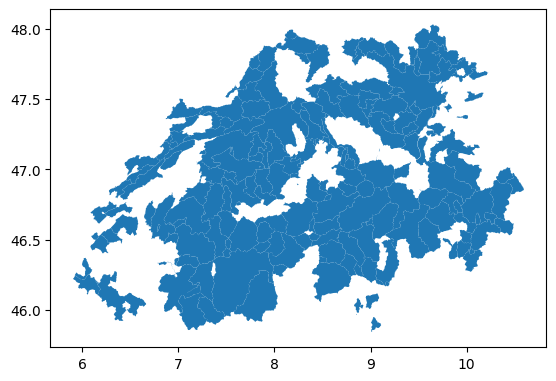

In [3]:
# Valid Basins:
valid_basins = [
    "4005",
    "2312",
    "4011",
    "2110",
    "2104",
    "2070",
    "2299",
    "2500",
    "2139",
    "2105",
    "2307",
    "3019",
    "4010",
    "2461",
    "4004",
    "2475",
    "2488",
    "2463",
    "2477",
    "4006",
    "3033",
    "2067",
    "2265",
    "2270",
    "2099",
    "2112",
    "2106",
    "3032",
    "4007",
    "4013",
    "2304",
    "2300",
    "4017",
    "4003",
    "2102",
    "2063",
    "2117",
    "4002",
    "2473",
    "4016",
    "3023",
    "2498",
    "3009",
    "2471",
    "4014",
    "2303",
    "2263",
    "2276",
    "2262",
    "2289",
    "4015",
    "4001",
    "2458",
    "2371",
    "2417",
    "2403",
    "2167",
    "5032",
    "2205",
    "2239",
    "2210",
    "2199",
    "2364",
    "2370",
    "2416",
    "2366",
    "2414",
    "2372",
    "2602",
    "2170",
    "2011",
    "2159",
    "2617",
    "2603",
    "2415",
    "2161",
    "2607",
    "2613",
    "2029",
    "2203",
    "2202",
    "5009",
    "2612",
    "2174",
    "2160",
    "2606",
    "2410",
    "2412",
    "2374",
    "2176",
    "2610",
    "2604",
    "2016",
    "2200",
    "2215",
    "2605",
    "2349",
    "2387",
    "2436",
    "2378",
    "2185",
    "2634",
    "2152",
    "2608",
    "2219",
    "2033",
    "2609",
    "2635",
    "2351",
    "2437",
    "2386",
    "2347",
    "2409",
    "2151",
    "2179",
    "2019",
    "2232",
    "2018",
    "2024",
    "2030",
    "2150",
    "2187",
    "2434",
    "2352",
    "2346",
    "2420",
    "2418",
    "2342",
    "2356",
    "2430",
    "2034",
    "2020",
    "5014",
    "2009",
    "2155",
    "2141",
    "2343",
    "2419",
    "2369",
    "2433",
    "2355",
    "2157",
    "2143",
    "2181",
    "2426",
    "2432",
    "2368",
    "4024",
    "2327",
    "2469",
    "4018",
    "2125",
    "2119",
    "2086",
    "2079",
    "2290",
    "2247",
    "2252",
    "2078",
    "2044",
    "2087",
    "3004",
    "2468",
    "4025",
    "2497",
    "2481",
    "3006",
    "2126",
    "2132",
    "2091",
    "2085",
    "2251",
    "2053",
    "2084",
    "2319",
    "3007",
    "2494",
    "2480",
    "2490",
    "2309",
    "2321",
    "2282",
    "2269",
    "2268",
    "2283",
    "2056",
    "2122",
    "2308",
    "2491",
    "2485",
    "2493",
    "2487",
    "3014",
    "2478",
    "4009",
    "2450",
    "4021",
    "2256",
    "2243",
    "2135",
    "2109",
    "4020",
    "4008",
    "3015",
    "2486",
]

gdf_clean = gdf_clean[gdf_clean["gauge_id"].isin(valid_basins)]

# Plot the data
gdf_clean.plot()

Min area: 0.11 km²
Max area: 1574.79 km²
Number of basins: 135


/Users/cooper/Desktop/CAMELS-CH/.venv/lib/python3.12/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


<Axes: >

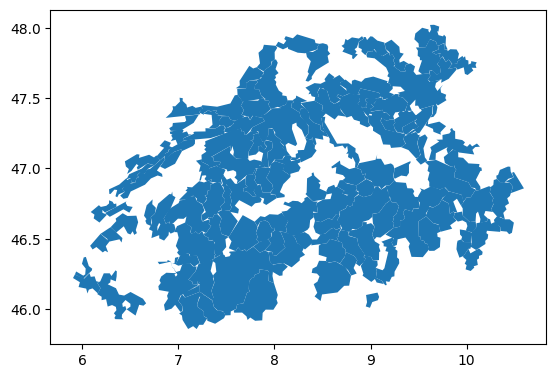

In [ ]:
# Convert area to km²
def area_to_km2(geometry):
    # Create temporary GeoDataFrame with geometry
    temp_gdf = gpd.GeoDataFrame(geometry=[geometry], crs="EPSG:4326")
    # Project to equal area projection (World Mollweide)
    temp_gdf_proj = temp_gdf.to_crs("ESRI:54009")
    # Calculate area in km²
    return temp_gdf_proj.geometry.area.iloc[0] / 1e6

# Calculate areas in km²
areas_km2 = gdf_clean["geometry"].apply(area_to_km2)
print(f"Min area: {areas_km2.min():.2f} km²")
print(f"Max area: {areas_km2.max():.2f} km²")

gdf_clean = gdf_clean[areas_km2 > 70]

# Print count of basins
print(f"Number of basins: {len(gdf_clean)}")

gdf_clean['geometry'] = gdf_clean['geometry'].simplify(tolerance=0.01)

# Plot the data
gdf_clean.plot()




In [5]:
# Print crs
print(gdf_clean.crs)
areas_km2 = gdf_clean["geometry"].apply(area_to_km2)
print(f"Min area: {areas_km2.min():.2f} km²")
print(f"Max area: {areas_km2.max():.2f} km²")

EPSG:4326
Min area: 71.48 km²
Max area: 1569.69 km²


In [6]:
output_path = "/Users/cooper/Desktop/CAMELS-CH/data/catchment_delineations/CAMELS_CH_clean_for_caravan.shp"
gdf_clean.to_file(output_path)